In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
%matplotlib qt

In [2]:
Bank_America = pd.read_csv("Bank_of_America_data.csv")
#german_Bank = pd.read_table("german.data",sep=" ")
#taiwan_Bank = pd.read_excel("default of credit card clients.xls",header=1,index_col=0)

FileNotFoundError: [Errno 2] File b'Bank_of_America_data.csv' does not exist: b'Bank_of_America_data.csv'

### I/ American Bank

In [3]:
#On va supprimer les lignes qui contiennent moins de 6 valeurs non manquantes
Bank_America_1=Bank_America.dropna(thresh=6)    

#On va remplacer les valeurs manquantes par le job Other
values = {'JOB': 'Other'}
Bank_America_1=Bank_America_1.fillna(value=values)    

#On va remplacer les valeurs manquantes de la colonne MORTDUE par 0.8*la valeur de la 
#colonne VALUE du meme lgne (parcequ'on a remarqué que c'est le cas pour les autres valeurs
#présentent)
Bank_America_1['MORTDUE'] = Bank_America_1['MORTDUE'].fillna(value=Bank_America_1['VALUE']*0.8) 
 
#On va  remplacer les valeurs manquantes de la colonne VALUE par 1.2*la valeur de la 
#colonne MORTDUE du meme ligne (parcequ'on a remarqué que c'est le cas pour les autres 
#valeurs présentent) 
Bank_America_1['VALUE'] = Bank_America_1['VALUE'].fillna(value=Bank_America_1['MORTDUE']*1.2)

#On va supprimer les 15 lignes que nous avons pas pu remplacer leurs colonne 
#MORTDUE et VALUE puisque ces deux colonnes n'ont ni une valeur dans MORTDUE ni dans VALUE
Bank_America_1.dropna(subset=["MORTDUE"],inplace=True)
Bank_America_1.dropna(subset=["VALUE"],inplace=True)

# On va faire un traitement qui nous permettera de remplir les valeurs manquantes REASON 
#et ceci en cherchant la majorité des clients ayant un profil similaire au profil de 
#ce client et ensuite on affecte la valeur de REASON de la majorité à ce champ vide 

for index,row in Bank_America_1.iterrows():
    if (pd.isnull(row["REASON"])):
        x=Bank_America_1["LOAN"][index]
        y=Bank_America_1["MORTDUE"][index]
        z=Bank_America_1["VALUE"][index]
        d=Bank_America_1.loc[(Bank_America_1["LOAN"]<x*1.2)&(x*0.8<Bank_America_1["LOAN"])
                             &(Bank_America_1["MORTDUE"]<y*1.2)&(y*0.8<Bank_America_1["MORTDUE"])
                             &(Bank_America_1["VALUE"]<z*1.2)&(z*0.8<Bank_America_1["VALUE"])]
        d1=d.loc[(d["REASON"]=="HomeImp")]
        s1=d1.shape[0]
        d2=d.loc[(d["REASON"]=="DebtCon")]
        s2=d2.shape[0]
        if(s1>s2):
            Bank_America_1["REASON"][index]=d1.iloc[0]["REASON"]
        elif (s2>s1):
            Bank_America_1["REASON"][index]=d2.iloc[0]["REASON"]

# Une seule ligne n'a pas eu de REASON parcequ'il y a pas un profil proche de ce client donc on va supprimer cette ligne 
Bank_America_1.dropna(subset=["REASON"],inplace=True)

# On va faire un traitement qui nous permettera de remplir les valeurs manquantes de YOJ et ceci en cherchant la majorité des clients ayant un profil similaire au profil de ce client et on calcule leurs mediane ensuite on affecte la valeur de la mediane à ce champ vide 

for index,row in Bank_America_1.iterrows():
    if (pd.isnull(row["YOJ"])):
        x=Bank_America_1["LOAN"][index]
        y=Bank_America_1["MORTDUE"][index]
        z=Bank_America_1["VALUE"][index]
        t=Bank_America_1["REASON"][index]
        v=Bank_America_1["JOB"][index]
        d=Bank_America_1.loc[(pd.notna(Bank_America_1["YOJ"]))
                             &(Bank_America_1["JOB"]==v)&(Bank_America_1["REASON"]==t)&
                             (Bank_America_1["LOAN"]<x*1.2)&(x*0.8<Bank_America_1["LOAN"])&
                             (Bank_America_1["MORTDUE"]<y*1.2)&(y*0.8<Bank_America_1["MORTDUE"])&
                             (Bank_America_1["VALUE"]<z*1.2)&(z*0.8<Bank_America_1["VALUE"])]
        l=np.median(d["YOJ"])
        if np.isnan(l):
            l=2.0
        Bank_America_1["YOJ"][index]=round(l, 1)
        
# Meme principe que la précédente
for index,row in Bank_America_1.iterrows():
    if (pd.isnull(row["DEROG"])):
        x=Bank_America_1["LOAN"][index]
        y=Bank_America_1["MORTDUE"][index]
        z=Bank_America_1["VALUE"][index]
        t=Bank_America_1["REASON"][index]
        v=Bank_America_1["JOB"][index]
        d=Bank_America_1.loc[(pd.notna(Bank_America_1["DEROG"]))&
                             (Bank_America_1["JOB"]==v)&(Bank_America_1["REASON"]==t)&
                             (Bank_America_1["LOAN"]<x*1.5)&(x*0.5<Bank_America_1["LOAN"])&
                             (Bank_America_1["MORTDUE"]<y*1.5)&(y*0.5<Bank_America_1["MORTDUE"])&
                             (Bank_America_1["VALUE"]<z*1.5)&(z*0.5<Bank_America_1["VALUE"])]
        if len(d)!=0:
            l=d["DEROG"].iloc[0]
        else:
            l=0.0 
        Bank_America_1["DEROG"][index]=round(l, 1)
        
# Meme principe que la précédente       
for index,row in Bank_America_1.iterrows():
    if (pd.isnull(row["DELINQ"])):
        x=Bank_America_1["LOAN"][index]
        y=Bank_America_1["MORTDUE"][index]
        z=Bank_America_1["VALUE"][index]
        t=Bank_America_1["REASON"][index]
        v=Bank_America_1["JOB"][index]
        w=Bank_America_1["YOJ"][index]
        d=Bank_America_1.loc[(pd.notna(Bank_America_1["DELINQ"]))&(Bank_America_1["JOB"]==v)&
                             (Bank_America_1["REASON"]==t)&(Bank_America_1["LOAN"]<x*1.5)&
                             (x*0.5<Bank_America_1["LOAN"])&(Bank_America_1["MORTDUE"]<y*1.5)&
                             (y*0.5<Bank_America_1["MORTDUE"])&(Bank_America_1["VALUE"]<z*1.5)
                             &(z*0.5<Bank_America_1["VALUE"])]
        if len(d)!=0:
            l=d["DELINQ"].iloc[0]
        else:
            l=0.0 
        Bank_America_1["DELINQ"][index]=round(l, 1)
        
# Meme principe que la précédente 
for index,row in Bank_America_1.iterrows():
    if (pd.isnull(row["CLAGE"])):
        x=Bank_America_1["LOAN"][index]
        y=Bank_America_1["MORTDUE"][index]
        z=Bank_America_1["VALUE"][index]
        t=Bank_America_1["REASON"][index]
        v=Bank_America_1["JOB"][index]
        w=Bank_America_1["YOJ"][index]
        d=Bank_America_1.loc[(pd.notna(Bank_America_1["CLAGE"]))&(Bank_America_1["JOB"]==v)&
                             (Bank_America_1["REASON"]==t)&(Bank_America_1["LOAN"]<x*1.5)&
                             (x*0.5<Bank_America_1["LOAN"])&(Bank_America_1["MORTDUE"]<y*1.5)&
                             (y*0.5<Bank_America_1["MORTDUE"])&(Bank_America_1["VALUE"]<z*1.5)
                             &(z*0.5<Bank_America_1["VALUE"])]
        if len(d)!=0:
            l=np.median(d["CLAGE"])
        else:
            l=173.466667 
        Bank_America_1["CLAGE"][index]=round(l, 6)

# Meme principe que la précédente        
for index,row in Bank_America_1.iterrows():
    if (pd.isnull(row["CLNO"])):
        x=Bank_America_1["LOAN"][index]
        y=Bank_America_1["MORTDUE"][index]
        z=Bank_America_1["VALUE"][index]
        t=Bank_America_1["REASON"][index]
        v=Bank_America_1["JOB"][index]
        d=Bank_America_1.loc[(pd.notna(Bank_America_1["CLNO"]))&(Bank_America_1["JOB"]==v)&
                             (Bank_America_1["REASON"]==t)&(Bank_America_1["LOAN"]<x*1.5)&
                             (x*0.5<Bank_America_1["LOAN"])&(Bank_America_1["MORTDUE"]<y*1.5)&
                             (y*0.5<Bank_America_1["MORTDUE"])&(Bank_America_1["VALUE"]<z*1.5)
                             &(z*0.5<Bank_America_1["VALUE"])]
        if len(d)!=0:
            l=np.median(d["CLNO"])
        else:
            l=20.0
        Bank_America_1["CLNO"][index]=round(l, 1)

# Meme principe que la précédente                
for index,row in Bank_America_1.iterrows():
    if (pd.isnull(row["NINQ"])):
        x=Bank_America_1["LOAN"][index]
        y=Bank_America_1["MORTDUE"][index]
        z=Bank_America_1["VALUE"][index]
        t=Bank_America_1["REASON"][index]
        v=Bank_America_1["JOB"][index]
        d=Bank_America_1.loc[(pd.notna(Bank_America_1["NINQ"]))&(Bank_America_1["JOB"]==v)&
                             (Bank_America_1["REASON"]==t)&(Bank_America_1["LOAN"]<x*1.5)&
                             (x*0.5<Bank_America_1["LOAN"])&(Bank_America_1["MORTDUE"]<y*1.5)&
                             (y*0.5<Bank_America_1["MORTDUE"])&(Bank_America_1["VALUE"]<z*1.5)
                             &(z*0.5<Bank_America_1["VALUE"])]
        if len(d)!=0:
            l=np.median(d["NINQ"])
        else:
            l=1.0
        Bank_America_1["NINQ"][index]=round(l, 1)
        
# Meme principe que la précédente
for index,row in Bank_America_1.iterrows():
    if (pd.isnull(row["DEBTINC"])):
        x=Bank_America_1["LOAN"][index]
        y=Bank_America_1["MORTDUE"][index]
        z=Bank_America_1["VALUE"][index]
        t=Bank_America_1["REASON"][index]
        v=Bank_America_1["JOB"][index]
        d=Bank_America_1.loc[(pd.notna(Bank_America_1["DEBTINC"]))&(Bank_America_1["JOB"]==v)
                             &(Bank_America_1["REASON"]==t)&(Bank_America_1["LOAN"]<x*1.5)&
                             (x*0.5<Bank_America_1["LOAN"])&(Bank_America_1["MORTDUE"]<y*1.5)&
                             (y*0.5<Bank_America_1["MORTDUE"])&(Bank_America_1["VALUE"]<z*1.5)
                             &(z*0.5<Bank_America_1["VALUE"])]
        if len(d)!=0:
            l=np.median(d["DEBTINC"])
        else:
            l=34.898413
        Bank_America_1["DEBTINC"][index]=round(l, 6)
        
# one hot encoding       
df1 = pd.get_dummies(Bank_America_1.REASON)
df2 = pd.get_dummies(Bank_America_1.JOB)
Bank_America_After_Encoding=pd.concat([Bank_America_1,df1,df2],axis=1)
Bank_America_After_Encoding.drop(labels=['REASON','JOB'], axis =1, inplace = True)


# Mettre la column cible dans un vecteur à part et la supprimer de la dataframe
cible_America=Bank_America_After_Encoding["BAD"]
Bank_America_Final=Bank_America_After_Encoding.drop(labels=['BAD'], axis =1)

# DataFrame surlaquelle on va appliquer nos algorithmes:
Bank_America_Final

C:\Users\iheb_\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\iheb_\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\iheb_\Anaconda3\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\iheb_\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\iheb_\Ana

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,DebtCon,HomeImp,Mgr,Office,Other,ProfExe,Sales,Self
0,1100,25860.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0,34.898413,0,1,0,0,1,0,0,0
1,1300,70053.0,68400.0,7.0,0.0,2.0,121.833333,0.0,14.0,34.898413,0,1,0,0,1,0,0,0
2,1500,13500.0,16700.0,4.0,0.0,0.0,149.466667,1.0,10.0,34.898413,0,1,0,0,1,0,0,0
4,1700,97800.0,112000.0,3.0,0.0,0.0,93.333333,0.0,14.0,30.635165,0,1,0,1,0,0,0,0
5,1700,30548.0,40320.0,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614,0,1,0,0,1,0,0,0
6,1800,48649.0,57037.0,5.0,3.0,2.0,77.100000,1.0,17.0,35.891654,0,1,0,0,1,0,0,0
7,1800,28502.0,43034.0,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894,0,1,0,0,1,0,0,0
8,2000,32700.0,46740.0,3.0,0.0,2.0,216.933333,1.0,12.0,36.388274,0,1,0,0,1,0,0,0
9,2000,49800.0,62250.0,16.0,0.0,0.0,115.800000,0.0,13.0,34.898413,0,1,0,0,0,0,1,0
11,2000,20627.0,29800.0,11.0,0.0,1.0,122.533333,1.0,9.0,34.898413,0,1,0,1,0,0,0,0


In [34]:
Bank_America = pd.read_csv("Bank_of_America_data.csv")
Bank_America_1=Bank_America.dropna(thresh=6)    #On va supprimer les lignes qui contiennent moins de 6 valeurs non manquantes


values = {'JOB': 'Other'}
Bank_America_1=Bank_America_1.fillna(value=values)    
#On va remplacer les valeurs manquantes par le job Other

Bank_America_1['MORTDUE'] = Bank_America_1['MORTDUE'].fillna(value=Bank_America_1['VALUE']*0.8) 
#On va remplacer les valeurs manquantes de la colonne MORTDUE par 0.8*la valeur de la 
#colonne VALUE du meme lgne (parcequ'on a remarqué que c'est le cas pour les autres valeurs
#présentent) 
Bank_America_1['VALUE'] = Bank_America_1['VALUE'].fillna(value=Bank_America_1['MORTDUE']*1.2) 
#On va  remplacer les valeurs manquantes de la colonne VALUE par 1.2*la valeur de la 
#colonne MORTDUE du meme ligne (parcequ'on a remarqué que c'est le cas pour les autres 
#valeurs présentent)

#On va supprimer les 15 lignes que nous avons pas pu remplacer leurs colonne 
#MORTDUE et VALUE puisque ces deux colonnes n'ont ni une valeur dans MORTDUE ni dans VALUE
Bank_America_1.dropna(subset=["MORTDUE"],inplace=True)
Bank_America_1.dropna(subset=["VALUE"],inplace=True)

# On va faire un traitement qui nous permettera de remplir les valeurs manquantes REASON 
#et ceci en cherchant la majorité des clients ayant un profil similaire au profil de 
#ce client et ensuite on affecte la valeur de REASON de la majorité à ce champ vide 
for index,row in Bank_America_1.iterrows():
    if (pd.isnull(row["REASON"])):
        x=Bank_America_1["LOAN"][index]
        y=Bank_America_1["MORTDUE"][index]
        z=Bank_America_1["VALUE"][index]
        d=Bank_America_1.loc[(Bank_America_1["LOAN"]<x*1.2)&(x*0.8<Bank_America_1["LOAN"])&(Bank_America_1["MORTDUE"]<y*1.2)&(y*0.8<Bank_America_1["MORTDUE"])&(Bank_America_1["VALUE"]<z*1.2)&(z*0.8<Bank_America_1["VALUE"])]
        d1=d.loc[(d["REASON"]=="HomeImp")]
        s1=d1.shape[0]
        d2=d.loc[(d["REASON"]=="DebtCon")]
        s2=d2.shape[0]
        if(s1>s2):
            Bank_America_1["REASON"][index]=d1.iloc[0]["REASON"]
        elif (s2>s1):
            Bank_America_1["REASON"][index]=d2.iloc[0]["REASON"]

# Une seule ligne n'a pas eu de REASON parcequ'il y a pas un profil proche de ce client donc on va supprimer cette ligne 
Bank_America_1.dropna(subset=["REASON"],inplace=True)

# On va faire un traitement qui nous permettera de remplir les valeurs manquantes de YOJ et ceci en cherchant la majorité des clients ayant un profil similaire au profil de ce client et on calcule leurs mediane ensuite on affecte la valeur de la mediane à ce champ vide 
for index,row in Bank_America_1.iterrows():
    if (pd.isnull(row["YOJ"])):
        x=Bank_America_1["LOAN"][index]
        y=Bank_America_1["MORTDUE"][index]
        z=Bank_America_1["VALUE"][index]
        t=Bank_America_1["REASON"][index]
        v=Bank_America_1["JOB"][index]
        d=Bank_America_1.loc[(pd.notna(Bank_America_1["YOJ"]))&(Bank_America_1["JOB"]==v)&(Bank_America_1["REASON"]==t)&(Bank_America_1["LOAN"]<x*1.2)&(x*0.8<Bank_America_1["LOAN"])&(Bank_America_1["MORTDUE"]<y*1.2)&(y*0.8<Bank_America_1["MORTDUE"])&(Bank_America_1["VALUE"]<z*1.2)&(z*0.8<Bank_America_1["VALUE"])]
        l=np.median(d["YOJ"])
        if np.isnan(l):
            l=2.0
        Bank_America_1["YOJ"][index]=round(l, 1)
        
# Meme principe que la précédente
for index,row in Bank_America_1.iterrows():
    if (pd.isnull(row["DEROG"])):
        x=Bank_America_1["LOAN"][index]
        y=Bank_America_1["MORTDUE"][index]
        z=Bank_America_1["VALUE"][index]
        t=Bank_America_1["REASON"][index]
        v=Bank_America_1["JOB"][index]
        d=Bank_America_1.loc[(pd.notna(Bank_America_1["DEROG"]))&(Bank_America_1["JOB"]==v)&(Bank_America_1["REASON"]==t)&(Bank_America_1["LOAN"]<x*1.5)&(x*0.5<Bank_America_1["LOAN"])&(Bank_America_1["MORTDUE"]<y*1.5)&(y*0.5<Bank_America_1["MORTDUE"])&(Bank_America_1["VALUE"]<z*1.5)&(z*0.5<Bank_America_1["VALUE"])]
        if len(d)!=0:
            l=d["DEROG"].iloc[0]
        else:
            l=0.0 
        Bank_America_1["DEROG"][index]=round(l, 1)
        
# Meme principe que la précédente       
for index,row in Bank_America_1.iterrows():
    if (pd.isnull(row["DELINQ"])):
        x=Bank_America_1["LOAN"][index]
        y=Bank_America_1["MORTDUE"][index]
        z=Bank_America_1["VALUE"][index]
        t=Bank_America_1["REASON"][index]
        v=Bank_America_1["JOB"][index]
        w=Bank_America_1["YOJ"][index]
        d=Bank_America_1.loc[(pd.notna(Bank_America_1["DELINQ"]))&(Bank_America_1["JOB"]==v)&(Bank_America_1["REASON"]==t)&(Bank_America_1["LOAN"]<x*1.5)&(x*0.5<Bank_America_1["LOAN"])&(Bank_America_1["MORTDUE"]<y*1.5)&(y*0.5<Bank_America_1["MORTDUE"])&(Bank_America_1["VALUE"]<z*1.5)&(z*0.5<Bank_America_1["VALUE"])]
        if len(d)!=0:
            l=d["DELINQ"].iloc[0]
        else:
            l=0.0 
        Bank_America_1["DELINQ"][index]=round(l, 1)
        
# Meme principe que la précédente 
for index,row in Bank_America_1.iterrows():
    if (pd.isnull(row["CLAGE"])):
        x=Bank_America_1["LOAN"][index]
        y=Bank_America_1["MORTDUE"][index]
        z=Bank_America_1["VALUE"][index]
        t=Bank_America_1["REASON"][index]
        v=Bank_America_1["JOB"][index]
        w=Bank_America_1["YOJ"][index]
        d=Bank_America_1.loc[(pd.notna(Bank_America_1["CLAGE"]))&(Bank_America_1["JOB"]==v)&(Bank_America_1["REASON"]==t)&(Bank_America_1["LOAN"]<x*1.5)&(x*0.5<Bank_America_1["LOAN"])&(Bank_America_1["MORTDUE"]<y*1.5)&(y*0.5<Bank_America_1["MORTDUE"])&(Bank_America_1["VALUE"]<z*1.5)&(z*0.5<Bank_America_1["VALUE"])]
        if len(d)!=0:
            l=np.median(d["CLAGE"])
        else:
            l=173.466667 
        Bank_America_1["CLAGE"][index]=round(l, 6)

# Meme principe que la précédente        
for index,row in Bank_America_1.iterrows():
    if (pd.isnull(row["CLNO"])):
        x=Bank_America_1["LOAN"][index]
        y=Bank_America_1["MORTDUE"][index]
        z=Bank_America_1["VALUE"][index]
        t=Bank_America_1["REASON"][index]
        v=Bank_America_1["JOB"][index]
        d=Bank_America_1.loc[(pd.notna(Bank_America_1["CLNO"]))&(Bank_America_1["JOB"]==v)&(Bank_America_1["REASON"]==t)&(Bank_America_1["LOAN"]<x*1.5)&(x*0.5<Bank_America_1["LOAN"])&(Bank_America_1["MORTDUE"]<y*1.5)&(y*0.5<Bank_America_1["MORTDUE"])&(Bank_America_1["VALUE"]<z*1.5)&(z*0.5<Bank_America_1["VALUE"])]
        if len(d)!=0:
            l=np.median(d["CLNO"])
        else:
            l=20.0
        Bank_America_1["CLNO"][index]=round(l, 1)

# Meme principe que la précédente                
for index,row in Bank_America_1.iterrows():
    if (pd.isnull(row["NINQ"])):
        x=Bank_America_1["LOAN"][index]
        y=Bank_America_1["MORTDUE"][index]
        z=Bank_America_1["VALUE"][index]
        t=Bank_America_1["REASON"][index]
        v=Bank_America_1["JOB"][index]
        d=Bank_America_1.loc[(pd.notna(Bank_America_1["NINQ"]))&(Bank_America_1["JOB"]==v)&(Bank_America_1["REASON"]==t)&(Bank_America_1["LOAN"]<x*1.5)&(x*0.5<Bank_America_1["LOAN"])&(Bank_America_1["MORTDUE"]<y*1.5)&(y*0.5<Bank_America_1["MORTDUE"])&(Bank_America_1["VALUE"]<z*1.5)&(z*0.5<Bank_America_1["VALUE"])]
        if len(d)!=0:
            l=np.median(d["NINQ"])
        else:
            l=1.0
        Bank_America_1["NINQ"][index]=round(l, 1)
        
# Meme principe que la précédente
for index,row in Bank_America_1.iterrows():
    if (pd.isnull(row["DEBTINC"])):
        x=Bank_America_1["LOAN"][index]
        y=Bank_America_1["MORTDUE"][index]
        z=Bank_America_1["VALUE"][index]
        t=Bank_America_1["REASON"][index]
        v=Bank_America_1["JOB"][index]
        d=Bank_America_1.loc[(pd.notna(Bank_America_1["DEBTINC"]))&(Bank_America_1["JOB"]==v)&(Bank_America_1["REASON"]==t)&(Bank_America_1["LOAN"]<x*1.5)&(x*0.5<Bank_America_1["LOAN"])&(Bank_America_1["MORTDUE"]<y*1.5)&(y*0.5<Bank_America_1["MORTDUE"])&(Bank_America_1["VALUE"]<z*1.5)&(z*0.5<Bank_America_1["VALUE"])]
        if len(d)!=0:
            l=np.median(d["DEBTINC"])
        else:
            l=34.898413
        Bank_America_1["DEBTINC"][index]=round(l, 6)
        
# one hot encoding       
df1 = pd.get_dummies(Bank_America_1.REASON)
df2 = pd.get_dummies(Bank_America_1.JOB)
Bank_America_After_Encoding=pd.concat([Bank_America_1,df1,df2],axis=1)
Bank_America_After_Encoding.drop(labels=['REASON','JOB'], axis =1, inplace = True)
Bank_America_After_Encoding

C:\Users\iheb_\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\iheb_\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\iheb_\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\iheb_\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\iheb_\Ana

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,DebtCon,HomeImp,Mgr,Office,Other,ProfExe,Sales,Self
0,1,1100,25860.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0,34.898413,0,1,0,0,1,0,0,0
1,1,1300,70053.0,68400.0,7.0,0.0,2.0,121.833333,0.0,14.0,34.898413,0,1,0,0,1,0,0,0
2,1,1500,13500.0,16700.0,4.0,0.0,0.0,149.466667,1.0,10.0,34.898413,0,1,0,0,1,0,0,0
4,0,1700,97800.0,112000.0,3.0,0.0,0.0,93.333333,0.0,14.0,30.635165,0,1,0,1,0,0,0,0
5,1,1700,30548.0,40320.0,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614,0,1,0,0,1,0,0,0
6,1,1800,48649.0,57037.0,5.0,3.0,2.0,77.100000,1.0,17.0,35.891654,0,1,0,0,1,0,0,0
7,1,1800,28502.0,43034.0,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894,0,1,0,0,1,0,0,0
8,1,2000,32700.0,46740.0,3.0,0.0,2.0,216.933333,1.0,12.0,36.388274,0,1,0,0,1,0,0,0
9,1,2000,49800.0,62250.0,16.0,0.0,0.0,115.800000,0.0,13.0,34.898413,0,1,0,0,0,0,1,0
11,1,2000,20627.0,29800.0,11.0,0.0,1.0,122.533333,1.0,9.0,34.898413,0,1,0,1,0,0,0,0


In [8]:
Bank_America_Final.head()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,DebtCon,HomeImp,Mgr,Office,Other,ProfExe,Sales,Self
0,1100,25860.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0,34.898413,0,1,0,0,1,0,0,0
1,1300,70053.0,68400.0,7.0,0.0,2.0,121.833333,0.0,14.0,34.898413,0,1,0,0,1,0,0,0
2,1500,13500.0,16700.0,4.0,0.0,0.0,149.466667,1.0,10.0,34.898413,0,1,0,0,1,0,0,0
4,1700,97800.0,112000.0,3.0,0.0,0.0,93.333333,0.0,14.0,30.635165,0,1,0,1,0,0,0,0
5,1700,30548.0,40320.0,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614,0,1,0,0,1,0,0,0


## Logistic Regression

In [37]:
from matplotlib import pyplot as plt 
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
#print(Bank_America_After_Encoding['BAD'].unique())
print(Bank_America_After_Encoding.groupby('BAD').size())

BAD
0    4684
1    1159
dtype: int64


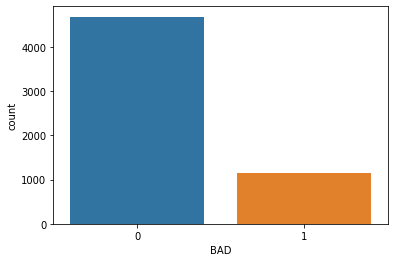

In [39]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.countplot(Bank_America_After_Encoding['BAD'],label="Count")
plt.show()

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

TypeError: Singleton array 47355.0 cannot be considered a valid collection.

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

lr = LogisticRegression()
scores = cross_val_score(lr, all_X, all_y, cv=10)
np.mean(scores)

## Kmeans

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

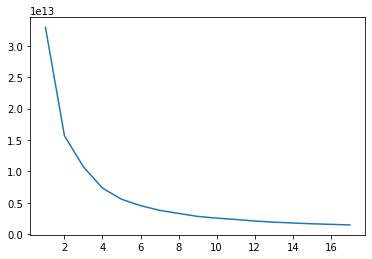

In [9]:
#Déterminer le nombre de clusters "Elbow"
L = []
for i in range(1,18):
    model = KMeans(n_clusters=i)
    model.fit(Bank_America_Final)
    L.append(model.inertia_)
plt.plot(range(1,18),L);

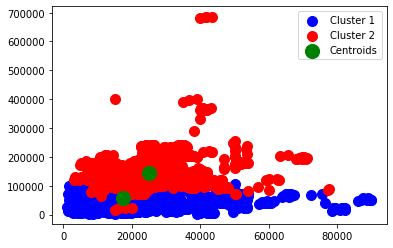

In [15]:
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters=2, precompute_distances='auto')
kmeans.fit(Bank_America_Final)
#print(kmeans.cluster_centers_)
y_kmeans = kmeans.fit_predict(Bank_America_Final)
plt.scatter(Bank_America_Final.values[y_kmeans == 0, 0], Bank_America_Final.values[y_kmeans == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(Bank_America_Final.values[y_kmeans == 1, 0], Bank_America_Final.values[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'green', label = 'Centroids')
plt.legend()
plt.show()


In [19]:
# Evaluer les résultats de k-Means 
#index triés des groupes 
idk = np.argsort(kmeans.labels_)
#affichage des observations et leurs groupes 
print(pd.DataFrame(Bank_America_Final.index[idk],kmeans.labels_[idk]));

       0
0      0
0   3498
0   3497
0   3496
0   3495
0   3494
0   3493
0   3492
0   3491
0   3490
0   3487
0   3486
0   3485
0   3484
0   3483
0   3482
0   3499
0   3481
0   3500
0   3502
0   3517
0   3516
0   3515
0   3514
0   3513
0   3512
0   3511
0   3510
0   3509
0   3508
..   ...
1   1114
1   5083
1   3573
1   3050
1   4280
1    547
1   4281
1   5077
1   4283
1   3576
1   4285
1    537
1   1118
1   5114
1   3581
1   3031
1   5111
1   5110
1   5109
1   5107
1   1122
1   5105
1   4267
1   5102
1   5101
1   4270
1   3039
1   2103
1   4273
1   3858

[5843 rows x 1 columns]


In [25]:
kmeans.labels_
V_Labels=Bank_America_Final.iloc[:,6]
pd.crosstab(V_Labels,kmeans.labels_)

col_0,0,1
CLAGE,,
0.000000,1,1
0.486711,1,0
0.507115,0,1
2.033333,1,0
2.820786,0,1
3.044384,0,1
4.412770,0,1
5.243341,1,0
6.133333,0,1


In [5]:
#Enregistrer le DataFrame Final dans un fichier CSV
Bank_America_Final.to_csv(r'C:\Users\iheb_\OneDrive\Desktop\Bank_America_Final.txt')

SyntaxError: invalid syntax (<ipython-input-5-89644c44bb2a>, line 1)

### II/ taiwanese Bank

In [50]:
# Pour la banque de Taiwan il y a pas de données manquantes Donc on va faire directement l'encodage (One Hot Encoder)
taiwan_Bank_1=taiwan_Bank
# Il ya des valeurs autres que 1,2 et 3 alors on a remplacer ces valeurs par "Others" qui vaut 3
taiwan_Bank_1.MARRIAGE.replace([0], [3], inplace=True)
# Il ya des valeurs autres que 1,2,3 et 4 dans la colonne EDUCATION alors on a remplacer ces valeurs par "Other" qui vaut 4
taiwan_Bank_1.EDUCATION.replace([0], [4], inplace=True)
taiwan_Bank_1.EDUCATION.replace([5], [4], inplace=True)
taiwan_Bank_1.EDUCATION.replace([6], [4], inplace=True)
# one hot encoding
df1 = pd.get_dummies(taiwan_Bank_1.SEX)
df1.rename(columns = {1:'Male',2:'Female'}, inplace = True)
df2 = pd.get_dummies(taiwan_Bank_1.MARRIAGE)
df2.rename(columns = {1:'Mar_Married',2:'Mar_Single',3:'Mar_Others'}, inplace = True)
df3 = pd.get_dummies(taiwan_Bank_1.EDUCATION)
df3.rename(columns = {1:'Ed_GS',2:'Ed_HS',3:'Ed_Univ',4:'Ed_Other'}, inplace = True)
taiwan_Bank_1 = pd.concat([taiwan_Bank_1,df1,df2,df3], axis = 1)
taiwan_Bank_1.drop(labels=['SEX','MARRIAGE','EDUCATION'], axis =1, inplace = True)

# Mettre la column cible dans un vecteur à part et la supprimer de la dataframe
cible_taiwan=taiwan_Bank_1["default payment next month"]
taiwan_Bank_Final=taiwan_Bank_1.drop(labels=['default payment next month'], axis =1)

# DataFrame surlaquelle on va appliquer nos algorithmes:
taiwan_Bank_Final

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT6,Male,Female,Mar_Married,Mar_Single,Mar_Others,Ed_GS,Ed_HS,Ed_Univ,Ed_Other
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,24,2,2,-1,-1,-2,-2,3913,3102,...,0,0,1,1,0,0,0,1,0,0
2,120000,26,-1,2,0,0,0,2,2682,1725,...,2000,0,1,0,1,0,0,1,0,0
3,90000,34,0,0,0,0,0,0,29239,14027,...,5000,0,1,0,1,0,0,1,0,0
4,50000,37,0,0,0,0,0,0,46990,48233,...,1000,0,1,1,0,0,0,1,0,0
5,50000,57,-1,0,-1,0,0,0,8617,5670,...,679,1,0,1,0,0,0,1,0,0
6,50000,37,0,0,0,0,0,0,64400,57069,...,800,1,0,0,1,0,1,0,0,0
7,500000,29,0,0,0,0,0,0,367965,412023,...,13770,1,0,0,1,0,1,0,0,0
8,100000,23,0,-1,-1,0,0,-1,11876,380,...,1542,0,1,0,1,0,0,1,0,0
9,140000,28,0,0,2,0,0,0,11285,14096,...,1000,0,1,1,0,0,0,0,1,0


In [51]:
# Enregistrer le DataFrame Final dans un fichier CSV
taiwan_Bank_Final.to_csv(r'C:\Users\iheb_\OneDrive\Desktop\Python_Projet_Final\taiwan_Bank_Final.txt')

### III/ German Bank

In [52]:
# Pour la banque de Taiwan il y a pas de données manquantes Donc on va faire directement l'encodage (One Hot Encoder)
german_Bank_1=german_Bank
# one hot encoding
df1 = pd.get_dummies(german_Bank_1.Status)
df1.rename(columns = {'A11':'Status_A11','A12':'Status_A12','A13':'Status_A13','A14':'Status_A14'}, inplace = True)
df2 = pd.get_dummies(german_Bank_1.credit_history)
df2.rename(columns = {'A30':'CredHist_A30','A31':'CredHist_A31','A32':'CredHist_A32','A33':'CredHist_A33','A34':'CredHist_A34'}, inplace = True)
df3 = pd.get_dummies(german_Bank_1.Purpose)
df3.rename(columns = {'A40':'Purpose_A40','A41':'Purpose_A41','A42':'Purpose_A42','A43':'Purpose_A43','A44':'Purpose_A44','A45':'Purpose_A45','A46':'Purpose_A46','A47':'Purpose_A47','A48':'Purpose_A48','A49':'Purpose_A49','A410':'Purpose_A410'}, inplace = True)
df4 = pd.get_dummies(german_Bank_1.Saving_amount)
df4.rename(columns = {'A61':'SaveAccount_A61','A62':'SaveAccount_A62','A63':'SaveAccount_A63','A64':'SaveAccount_A64','A65':'SaveAccount_A65'}, inplace = True)
df5 = pd.get_dummies(german_Bank_1.YOJ)
df5.rename(columns = {'A71':'YOJ_A71','A72':'YOJ_A72','A73':'YOJ_A73','A74':'YOJ_A74','A75':'YOJ_A75'}, inplace = True)
df6 = pd.get_dummies(german_Bank_1.Status_SEX)
df6.rename(columns = {'A91':'Status&Sex_A91','A92':'Status&Sex_A92','A93':'Status&Sex_A93','A94':'Status&Sex_A94','A95':'Status&Sex_A95'}, inplace = True)
df7 = pd.get_dummies(german_Bank_1.debtors_guarantors)
df7.rename(columns = {'A101':'DebGuarant_A101','A102':'DebGuarant_A102','A103':'DebGuarant_A103'}, inplace = True)
df9 = pd.get_dummies(german_Bank_1.Property)
df9.rename(columns = {'A121':'Property_A121','A122':'Property_A122','A123':'Property_A123','A124':'Property_A124'}, inplace = True)
df10 = pd.get_dummies(german_Bank_1.installment_plans)
df10.rename(columns = {'A141':'InstallPlan_A141','A142':'InstallPlan_A142','A143':'InstallPlan_A143'}, inplace = True)
df11 = pd.get_dummies(german_Bank_1.Housing)
df11.rename(columns = {'A151':'Housing_A151','A152':'Housing_A152','A153':'Housing_A153'}, inplace = True)
df12 = pd.get_dummies(german_Bank_1.Job)
df12.rename(columns = {'A171':'Job_A171','A172':'Job_A172','A173':'Job_A173','A174':'Job_A174'}, inplace = True)
df13 = pd.get_dummies(german_Bank_1.Telephone)
df13.rename(columns = {'A191':'Tel_None','A192':'Tel_Registred'}, inplace = True)
df14 = pd.get_dummies(german_Bank_1.Foreign_warker)
df14.rename(columns = {'A201':'ForeignWorker_Yes','A202':'ForeignWorker_No'}, inplace = True)

german_Bank_1 = pd.concat([german_Bank_1,df1,df2,df3,df4,df5,df6,df7,df9,df10,df11,df12,df13,df14], axis = 1)
german_Bank_1.drop(labels=['Status','credit_history','Purpose','Saving_amount','YOJ','Status_SEX','debtors_guarantors','Property','installment_plans','Housing','Job','Telephone','Foreign_warker'], axis =1, inplace = True)

# Mettre la column cible dans un vecteur à part et la supprimer de la dataframe
cible_german=german_Bank_1["Cost"]
german_Bank_Final=german_Bank_1.drop(labels=['Cost'], axis =1)

# DataFrame surlaquelle on va appliquer nos algorithmes:
german_Bank_Final


,Duration,Credit_amount,Installment_rate,Residence,Age,Nb_credit,persons_liable,Status_A11,Status_A12,Status_A13,...,Housing_A152,Housing_A153,Job_A171,Job_A172,Job_A173,Job_A174,Tel_None,Tel_Registred,ForeignWorker_Yes,ForeignWorker_No
0,6,1169,4,4,67,2,1,1,0,0,...,1,0,0,0,1,0,0,1,1,0
1,48,5951,2,2,22,1,1,0,1,0,...,1,0,0,0,1,0,1,0,1,0
2,12,2096,2,3,49,1,2,0,0,0,...,1,0,0,1,0,0,1,0,1,0
3,42,7882,2,4,45,1,2,1,0,0,...,0,1,0,0,1,0,1,0,1,0
4,24,4870,3,4,53,2,2,1,0,0,...,0,1,0,0,1,0,1,0,1,0
5,36,9055,2,4,35,1,2,0,0,0,...,0,1,0,1,0,0,0,1,1,0
6,24,2835,3,4,53,1,1,0,0,0,...,1,0,0,0,1,0,1,0,1,0
7,36,6948,2,2,35,1,1,0,1,0,...,0,0,0,0,0,1,0,1,1,0
8,12,3059,2,4,61,1,1,0,0,0,...,1,0,0,1,0,0,1,0,1,0
9,30,5234,4,2,28,2,1,0,1,0,...,1,0,0,0,0,1,1,0,1,0


In [49]:
# Enregistrer le DataFrame Final dans un fichier CSV
german_Bank_Final.to_csv(r'C:\Users\iheb_\OneDrive\Desktop\Python_Projet_Final\german_Bank_Final.txt')

## -Kmeans

In [54]:
import numpy as np
from  sklearn.cluster import KMeans
km= KMeans(n_clusters=2).fit(Bank_America_Final)
Bank_America_Final['CLUSTER']=km.labels_
table=pd.crosstab(Bank_America_Final['BAD'],Bank_America_Final['CLUSTER'])
table  #VP  VN
       #FN  FP

KeyError: 'BAD'

In [ ]:
Bank_America_Final.head()